In [27]:
import os
import pathlib
import pickle

import numpy as np
import scipy.stats as stats
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
class Loader:
    def __init__(self, occ, noise, ind, img_num):
        self.noise = noise
        self.img_num = img_num
        
        def gen_path(occ, noise, ind, img_num):
            emd_path = "emd_csv/{}_{}_{}_{}_emd.csv".format(occ, noise, ind, img_num)
            area_path = "emd_csv/{}_{}_{}_{}_area.csv".format(occ, noise, ind, img_num)
            return emd_path, area_path
        
        emd_path, area_path = gen_path(occ, noise, ind, img_num)
        
        self.emd_val = np.loadtxt(emd_path, delimiter=',')
        self.area_val = np.loadtxt(area_path, delimiter=',')
        
        

In [29]:
l = Loader("q_a", "0mm", "q_1_a", 128)

In [30]:
occs = ["q_a", "q_aothin", "q_aothick"]
noises = ["0mm", "1mm", "3mm"]
inds = ["q_1_a", "q_2_a", "q_3_a"]
img_nums = [128,64,32]

In [31]:
l = []
for noise in noises:
    for img_num in img_nums:
        temp_emd_val_list = []
        temp_area_val_list = []
        for occ in occs:
            for ind in inds:
                lo = Loader(occ, noise, ind, img_num)
                for emd_val, area_val in zip(lo.emd_val, lo.area_val):
                    temp_l = [noise, img_num, area_val, emd_val, occ]
                    l.append(temp_l)
l = np.array(l)

In [32]:
def dataset_discriminater(dataset):
    if dataset == "q_a":
        return "No pillars"
    elif dataset == "q_aothin":
        return "Thin pillars"
    else:
        return "Thick pillars"

In [33]:
dataset_list = [dataset_discriminater(dataset) for dataset in l[:,4]]

In [34]:
df = pd.DataFrame({
    'Noise' : l[:,0],
    'Image Number' : l[:,1].astype("int"),
    'Leaf Area' : l[:,2].astype("float"),
    'Standardized EMD': l[:,3].astype("float")/np.sqrt(l[:,2].astype("float")),
    "Dataset" : dataset_list
    })

In [35]:
e_df = df[(df["Noise"] == "0mm") & (df["Image Number"] == 128)]

In [36]:
e_df = df[(df["Noise"] == "0mm")]

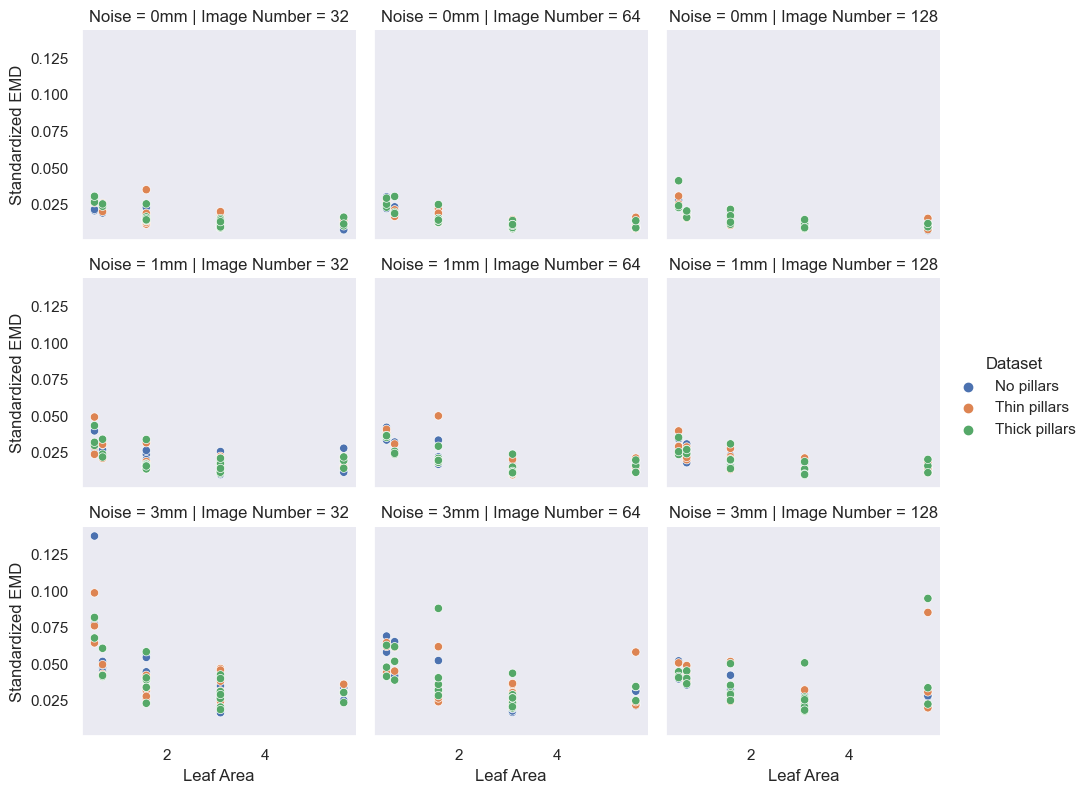

In [37]:
sns.set_theme(style="dark")

g = sns.relplot(
    data=df, kind="scatter",
    x="Leaf Area", y="Standardized EMD", col="Image Number", row="Noise",
    hue="Dataset",
    height=2.7, aspect=1.2, legend=True,
)
